In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [7]:

# 5 repetitions
# FC LSVI, [100, 1000, 10000], 100, 1, 10, scH3
# FC LSVI, //, 100, 1/(t+1) , inf, sch1
# ADVI PYMC FC , //, 100, ADAGRAD
average_elapsed_time = np.array([[4.360817193984985, 10.094022130966186, 19.250379657745363,
                                  47.49628872871399,
                                  ], [3.4073907375335692, 5.663813066482544, 18.753844356536867,
                                      34.68504190444946],
                                 [5.076862430572509, 7.630458545684815, 19.9551700592041
                                     , 33.90070657730102]])

median_elapsed_time = np.array([[3.75643253326416, 10.084840774536133, 18.605260133743286,
                                 34.943785667419434],
                                [2.713860511779785, 5.680481910705566, 18.653026580810547,
                                 34.73198843002319],
                                [4.872496128082275, 7.630124807357788, 19.38558530807495, 33.765504598617554]])

min_elapsed_time = np.array([[3.334270715713501, 9.858523607254028, 18.46614956855774,
                              34.794851303100586],
                             [2.7024688720703125, 5.531165838241577, 18.602253675460815,
                              34.44559073448181],
                             [4.615549087524414, 7.550577878952026, 19.294901609420776, 33.724193811416626]])

max_elapsed_time = np.array([[6.921351432800293, 10.370682716369629, 21.70014238357544,
                              72.95816946029663],
                             [6.098657608032227, 5.7679078578948975, 19.051411151885986, 34.79058527946472],
                             [5.947683572769165, 7.707855463027954, 22.28180193901062, 34.19564700126648]])


std_elapsed_time = np.array([[1.4663005860537708,
                              0.1972435345054281, 1.3874438887039096,
                              17.86909049399371],
                             [1.5051993523490557,
                              0.09668273792068362, 0.18416622317557815,
                              0.1366881420108835],
                             [0.531612086984474, 0.06044785079686564,
                              1.301657039299659,
                              0.21186501176020842]])

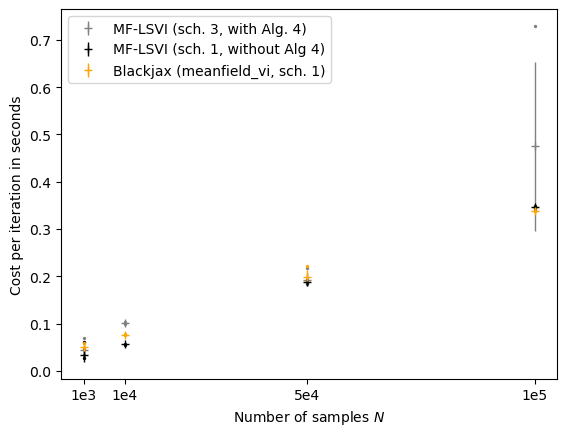

In [8]:
range_x = [1000, 10000, 50000, 100000]
labels = ["MF-LSVI (sch. 3, with Alg. 4)", "MF-LSVI (sch. 1, without Alg 4)", "Blackjax (meanfield_vi, sch. 1)"]
colors = ["gray", "black", "orange"]
for i in range(3):
    plt.errorbar(x=range_x, y=average_elapsed_time[i] / 100, yerr=std_elapsed_time[i] / 100, elinewidth=1,
                 label=labels[i], fmt=' ', marker='+', color=colors[i])
    plt.scatter(x=range_x, y=min_elapsed_time[i]/100, marker='o', color=colors[i], s=2)
    plt.scatter(x=range_x, y=max_elapsed_time[i]/100, marker='o', color=colors[i], s=2)
plt.xlabel(r"Number of samples $N$")
plt.ylabel("Cost per iteration in seconds")
plt.xticks(range_x, ["1e3", "1e4", "5e4", "1e5"])
plt.legend()
plt.savefig("cost_per_iteration_mean_field_mnist.pdf")

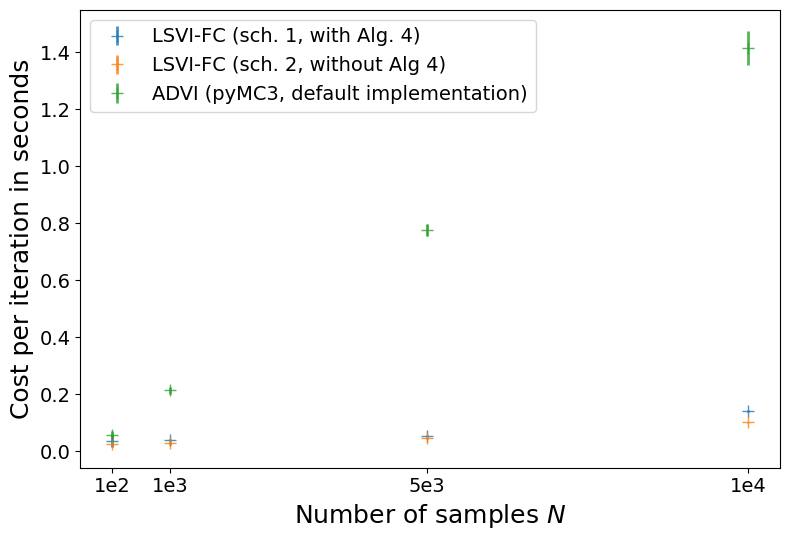

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

# Load the data
with open('walltime_full_cov.pkl', 'rb') as f:
    data = pickle.load(f)

# Define the range and labels
range_x = [100, 1000, 5000, 10000]
labels = ["LSVI-FC (sch. 1, with Alg. 4)", "LSVI-FC (sch. 2, without Alg 4)", "ADVI (pyMC3, default implementation)"]

# Create the figure and axis with consistent sizing
fig, ax = plt.subplots(1, 1, figsize=(8, 5.5))

# Plot the data with error bars and no connecting lines
for idx in range(len(data)):
    ax.errorbar(
        x=range_x, 
        y=np.flip(data[idx, :].mean(axis=-1))/100 if idx != 2 else data[idx, :].mean(axis=-1)/100,
        yerr=2*data[idx, :].std(axis=-1)/100,  # 2 standard deviations for the error bars
        label=labels[idx],
        fmt=' ',  # This ensures no line is drawn between points
        marker='+',  # Use markers for the data points
        elinewidth=2,  # Error bar line width
        alpha=0.8,  # Transparency for the error bars
        markersize=8  # Set marker size for visibility
    )

# Adjust the axis labels, ticks, and layout
ax.set_xlabel(r"Number of samples $N$", fontsize=18)
ax.set_ylabel("Cost per iteration in seconds", fontsize=18)
ax.set_xticks(range_x)
ax.set_xticklabels(["1e2", "1e3", "5e3", "1e4"], fontsize=14)

# Set tick parameters
ax.tick_params(labelsize=14)

# Add the legend
ax.legend(loc="best", fontsize=14)

# Save the figure
plt.tight_layout()
plt.savefig("cost_per_iteration_sonar.pdf", dpi=300)


In [54]:
(data/data[:,0,0,np.newaxis,np.newaxis])

array([[[ 1.        ,  0.82922537,  0.82571384,  0.82787473,
          0.84772902],
        [ 0.34660799,  0.32364208,  0.32502045,  0.33564437,
          0.32505438],
        [ 0.2659133 ,  0.23952475,  0.2413597 ,  0.24340174,
          0.24310168],
        [ 0.24467079,  0.21838807,  0.21557841,  0.21429716,
          0.21966235]],

       [[ 1.        ,  0.96592502,  0.96960112,  0.96736345,
          0.97909784],
        [ 0.48996611,  0.41762413,  0.42001678,  0.41312353,
          0.41899888],
        [ 0.29987342,  0.2577647 ,  0.26155738,  0.25863653,
          0.25987334],
        [ 0.26967241,  0.23295916,  0.23139479,  0.23299204,
          0.2333146 ]],

       [[ 1.        ,  0.81794656,  0.81042933,  0.79863435,
          0.78873026],
        [ 3.02702612,  3.09998218,  3.26043245,  3.16110104,
          2.99587892],
        [11.28472776, 11.07497379, 11.44105371, 11.4509021 ,
         11.47272646],
        [20.13994223, 20.78665053, 20.55112655, 20.42618918,
         21

In [55]:
data[:,0,0,np.newaxis,np.newaxis]

array([[[16.3544935 ]],

       [[10.25302972]],

       [[ 6.85082178]]])